Mount google drive

This notebook is the same as DCUnet.ipynb but use 16kHz wavefiles.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Create working directory and download DCUnet programs and model files 

In [9]:
!mkdir -p /content/drive/MyDrive/Learning/EIE558
%cd /content/drive/MyDrive/Learning/EIE558
!if [ ! -f DCUnet16.tgz ]; then wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/DCUnet16.tgz; fi
!tar zxf DCUnet16.tgz
!rm -f *.tgz*

/content/drive/MyDrive/Learning/EIE558
--2021-02-22 12:26:03--  http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/DCUnet16.tgz
Resolving bioinfo.eie.polyu.edu.hk (bioinfo.eie.polyu.edu.hk)... 158.132.151.227
Connecting to bioinfo.eie.polyu.edu.hk (bioinfo.eie.polyu.edu.hk)|158.132.151.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10690275 (10M)
Saving to: ‘DCUnet16.tgz’

DCUnet16.tgz        100%[===================>]  10.19M  2.77MB/s    in 6.4s    

2021-02-22 12:26:10 (1.58 MB/s) - ‘DCUnet16.tgz’ saved [10690275/10690275]



In [3]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet16
!ls

/content/drive/MyDrive/Learning/EIE558/DCUnet16
audio	    model.py	 readme		   SpeechDataset.py
data	    models	 requirements.txt  stft-istft-example.py
dc-unet.py  __pycache__  scripts


Create data/ directory and download training and test data

In [12]:
%%shell
dir="data" 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi

Streaming output truncated to the last 5000 lines.
  inflating: data/noisy_trainset_28spk_wav/p228_345.wav  
  inflating: data/noisy_trainset_28spk_wav/p228_162.wav  
  inflating: data/noisy_trainset_28spk_wav/p267_300.wav  
  inflating: data/noisy_trainset_28spk_wav/p277_040.wav  
  inflating: data/noisy_trainset_28spk_wav/p270_232.wav  
  inflating: data/noisy_trainset_28spk_wav/p278_328.wav  
  inflating: data/noisy_trainset_28spk_wav/p274_096.wav  
  inflating: data/noisy_trainset_28spk_wav/p236_340.wav  
  inflating: data/noisy_trainset_28spk_wav/p254_065.wav  
  inflating: data/noisy_trainset_28spk_wav/p273_346.wav  
  inflating: data/noisy_trainset_28spk_wav/p254_098.wav  
  inflating: data/noisy_trainset_28spk_wav/p278_373.wav  
  inflating: data/noisy_trainset_28spk_wav/p256_225.wav  
  inflating: data/noisy_trainset_28spk_wav/p282_322.wav  
  inflating: data/noisy_trainset_28spk_wav/p231_385.wav  
  inflating: data/noisy_trainset_28spk_wav/p278_132.wav  
  inflating: data/noi

In [13]:
!du -s -h ./*

413K	./audio
2.2G	./data
9.0K	./dc-unet.py
9.5K	./model.py
11M	./models
22K	./__pycache__
512	./readme
512	./requirements.txt
5.0K	./scripts
2.5K	./SpeechDataset.py
1.5K	./stft-istft-example.py


In [15]:
!ls data

clean_testset_wav	  noisy_testset_wav
clean_trainset_28spk_wav  noisy_trainset_28spk_wav


Install the version of Pytorch and Torchaudio that work with the DCUnet code

In [11]:
!pip3 install torch==1.5.1 torchaudio==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html


In [7]:
!pip install pesq

  Created wheel for pesq: filename=pesq-0.0.2-cp36-cp36m-linux_x86_64.whl size=159950 sha256=c980bb706e93b5e69ca9de56638ec07a2ef3e627151082feddc2d5d41fe9d34a
  Stored in directory: /root/.cache/pip/wheels/95/96/02/64c5b0ffb69c5651438f511679983a6ed3ef23873d2e9ecde4
Successfully built pesq


In [18]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet16

/content/drive/MyDrive/Learning/EIE558/DCUnet16


Train a new DCUnet model and save it to directory model/. It will take several hours. Skip this step if you want to use the default model in model/.

In [19]:
!python3 dc-unet.py train

Training mode
  0% 0/3 [00:00<?, ?it/s]Loss before training:0.588722
Processed 500 mini-batch: loss=-0.859
Processed 1000 mini-batch: loss=-0.887
Processed 1500 mini-batch: loss=-0.898
Processed 2000 mini-batch: loss=-0.905
Processed 2500 mini-batch: loss=-0.910
Processed 3000 mini-batch: loss=-0.915
Processed 3500 mini-batch: loss=-0.918
Processed 4000 mini-batch: loss=-0.921
Processed 4500 mini-batch: loss=-0.923
Processed 5000 mini-batch: loss=-0.924
Processed 5500 mini-batch: loss=-0.926
Epoch: 1/3... Loss: -0.926868... Test Loss: -0.977736
 33% 1/3 [17:30<35:00, 1050.31s/it]Processed 500 mini-batch: loss=-0.946
Processed 1000 mini-batch: loss=-0.946
Processed 1500 mini-batch: loss=-0.947
Processed 2000 mini-batch: loss=-0.947
Processed 2500 mini-batch: loss=-0.947
Processed 3000 mini-batch: loss=-0.947
Processed 3500 mini-batch: loss=-0.947
Processed 4000 mini-batch: loss=-0.947
Processed 4500 mini-batch: loss=-0.947
Processed 5000 mini-batch: loss=-0.948
Processed 5500 mini-batch

In [10]:
!ls data

clean_testset_wav	  noisy_testset_wav
clean_trainset_28spk_wav  noisy_trainset_28spk_wav


Test the DCUnet.

In [14]:
!python3 dc-unet.py test

Test mode
PESQ = 1.9006036897596803
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>


Play noisy and denoised wavefiles

Noisy speech


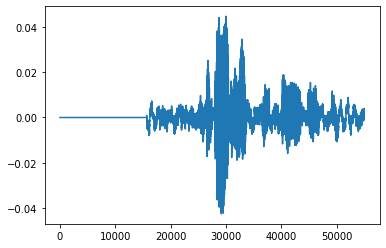

In [15]:
from IPython.display import Audio
import soundfile as sf
from matplotlib.pylab import plot
noisy_speech, srate = sf.read('audio/noisy.wav')
plot(noisy_speech)
print('Noisy speech')
Audio(noisy_speech, rate=srate) 

Denoised speech


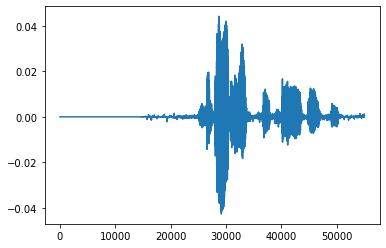

In [16]:
from IPython.display import Audio
import soundfile as sf
from matplotlib.pylab import plot
denoised_speech, srate = sf.read('audio/denoised.wav')
plot(denoised_speech)
print('Denoised speech')
Audio(denoised_speech, rate=srate)  